In [1]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [2]:
llm.invoke("hi").content

'Hi there! 👋  What can I do for you today?\n'

In [3]:
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

In [4]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [5]:
workflow=StateGraph(MessagesState)
workflow.add_node("chatbot",call_model)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot",END)
app=workflow.compile()

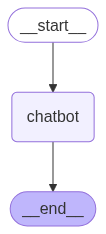

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

NameError: name 'AnyMessage' is not defined

In [11]:
input={"messages":["hi, my name is adi"]}

In [12]:
app.invoke(input)

{'messages': [HumanMessage(content='hi, my name is adi', additional_kwargs={}, response_metadata={}, id='8dcff47b-f5e8-4665-9449-98d5018b85d2'),
  AIMessage(content="Hi Adi, it's nice to meet you! 👋 \n\nWhat can I do for you today? 😊  \n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 15, 'total_tokens': 42, 'completion_time': 0.049090909, 'prompt_time': 0.001864228, 'queue_time': 0.26552117799999997, 'total_time': 0.050955137}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--cddbc16c-2d88-48ee-a8ef-9e08517c8b3f-0', usage_metadata={'input_tokens': 15, 'output_tokens': 27, 'total_tokens': 42})]}

In [13]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from chatbot Node
_______
{'messages': [AIMessage(content="Hi Adi, it's nice to meet you! 👋 \n\nWhat can I do for you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 15, 'total_tokens': 41, 'completion_time': 0.047272727, 'prompt_time': 0.001902088, 'queue_time': 0.266122802, 'total_time': 0.049174815}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--807db2ec-1956-4174-8686-3e42bfb89210-0', usage_metadata={'input_tokens': 15, 'output_tokens': 26, 'total_tokens': 41})]}




In [ ]:
@tool
def search(query: str):
    """this is my custom tool."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and foggy."
    return "It's 90 degrees and sunny."

In [ ]:
search.invoke("what is a temprature in sf?")

"It's 60 degrees and foggy."

In [ ]:
search.invoke("what is a weather in india?")

"It's 90 degrees and sunny."

In [ ]:
search

StructuredTool(name='search', description='this is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000251094DF010>)

In [ ]:
tools=[search]

In [ ]:
tool_node=ToolNode(tools)

In [ ]:
llm_with_tool=llm.bind_tools(tools)

In [ ]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

In [ ]:
response=call_model({"messages": ["hi how are you?"]})

In [ ]:
response

{'messages': [AIMessage(content='I am doing well, thank you. How are you?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 941, 'total_tokens': 955, 'completion_time': 0.025454545, 'prompt_time': 0.030139486, 'queue_time': 0.0028640919999999986, 'total_time': 0.055594031}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-7176e5d9-307e-4644-93e2-99d358198179-0', usage_metadata={'input_tokens': 941, 'output_tokens': 14, 'total_tokens': 955})]}

[AIMessage(content='I am doing well, thank you. How are you?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 941, 'total_tokens': 955, 'completion_time': 0.025454545, 'prompt_time': 0.030139486, 'queue_time': 0.0028640919999999986, 'total_time': 0.055594031}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-7176e5d9-307e-4644-93e2-99d358198179-0', usage_metadata={'input_tokens': 941, 'output_tokens': 14, 'total_tokens': 955})]

In [ ]:
messages = response['messages']

In [ ]:
last_message=messages[-1]

In [ ]:
last_message.tool_calls

[]

In [ ]:
response=call_model({"messages": ["what is a weather in India?"]})

In [ ]:
response

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5q56', 'function': {'arguments': '{"query":"weather in India"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 943, 'total_tokens': 1025, 'completion_time': 0.149090909, 'prompt_time': 0.031104902, 'queue_time': 0.003129146000000003, 'total_time': 0.180195811}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-35d08bfe-0844-4902-8d36-71630335dd9e-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in India'}, 'id': 'call_5q56', 'type': 'tool_call'}], usage_metadata={'input_tokens': 943, 'output_tokens': 82, 'total_tokens': 1025})]}

[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5q56', 'function': {'arguments': '{"query":"weather in India"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 943, 'total_tokens': 1025, 'completion_time': 0.149090909, 'prompt_time': 0.031104902, 'queue_time': 0.003129146000000003, 'total_time': 0.180195811}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-35d08bfe-0844-4902-8d36-71630335dd9e-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in India'}, 'id': 'call_5q56', 'type': 'tool_call'}], usage_metadata={'input_tokens': 943, 'output_tokens': 82, 'total_tokens': 1025})]

In [ ]:
messages = response['messages']

In [ ]:
last_message=messages[-1]

In [ ]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in India'},
  'id': 'call_5q56',
  'type': 'tool_call'}]

In [ ]:
def router_function(state: MessagesState) -> Literal["tools", END]:
    #print(f"here is a state from should continue {state}")
    messages = state['messages']
    last_message = messages[-1]
    #print(f"here is a last message from should continue {last_message}")
    if last_message.tool_calls:
        return "tools"
    return END

In [ ]:
# Define a new graph
workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

workflow.add_edge(START, "agent")

workflow.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})

app = workflow.compile()

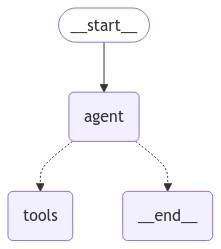

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
app.invoke({"messages": ["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='d2a4d375-5d1f-40c4-b98e-beaf7165bcdf'),
  AIMessage(content='I am doing well, thank you. How are you?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 941, 'total_tokens': 955, 'completion_time': 0.025454545, 'prompt_time': 0.039004883, 'queue_time': 0.0037452260000000043, 'total_time': 0.064459428}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-9d46977e-2ac6-4907-89fc-35d5a1d252e0-0', usage_metadata={'input_tokens': 941, 'output_tokens': 14, 'total_tokens': 955})]}

In [ ]:
app.invoke({"messages": ["what is the weather in sf"]})

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='7eabf598-398a-49ea-8551-2c764aa11896'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_a863', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 942, 'total_tokens': 1022, 'completion_time': 0.145454545, 'prompt_time': 0.030097005, 'queue_time': 0.002562520000000002, 'total_time': 0.17555155}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0f59eedd-1875-4a0e-bd9d-e5ddd385af39-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'call_a863', 'type': 'tool_call'}], usage_metadata={'input_tokens': 942, 'output_tokens': 80, 'total_tokens': 1022}),
  ToolMessage(content="It's 60 degrees and foggy.", name='search', id='40082cc2-1627-4a

In [ ]:
workflow.add_edge("tools", 'agent')

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [ ]:
app = workflow.compile()

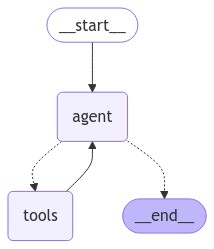

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
for output in app.stream({"messages": ["what is the weather in sf"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xt3r', 'function': {'arguments': '{"query":"weather in sf"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 942, 'total_tokens': 1022, 'completion_time': 0.145454545, 'prompt_time': 0.030358503, 'queue_time': 0.002830924000000002, 'total_time': 0.175813048}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-166abd47-7d7a-4f4f-a282-fff9a19b2e2b-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in sf'}, 'id': 'call_xt3r', 'type': 'tool_call'}], usage_metadata={'input_tokens': 942, 'output_tokens': 80, 'total_tokens': 1022})]}


here is output from tools
_______
{'messages': [ToolMessage(content="It's 60 degrees and foggy.", name='search', id='5193a4e8-8ed9-400e-b0ea-51c22d84a17a', tool_call_id='call_xt3r')]}


her

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [ ]:
# Define a new graph
workflow3 = StateGraph(MessagesState)

workflow3.add_node("agent", call_model)
workflow3.add_node("tools", tool_node)

workflow3.add_edge(START, "agent")

workflow3.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})

workflow3.add_edge("tools", 'agent')

In [ ]:
app3 = workflow3.compile(checkpointer = memory)

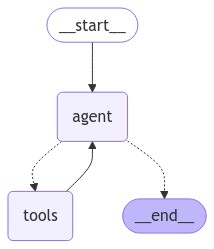

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
config = {"configurable": {"thread_id": "1"}}

In [ ]:
events = app3.stream(
    {"messages": ["Hi there! My name is Sunny."]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Sunny.
================================== Ai Message ==================================

Nice to meet you, Sunny!


In [ ]:
events = app3.stream(
    {"messages": ["can you tell me what was my name?"]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

can you tell me what was my name?
================================== Ai Message ==================================

Your name is Sunny.


In [ ]:
memory.get(config)

{'v': 1,
 'ts': '2024-10-29T12:40:56.597779+00:00',
 'id': '1ef95f30-b00f-62c6-8010-f7735af1bd97',
 'channel_values': {'messages': [HumanMessage(content='Hi there! My name is Sunny.', additional_kwargs={}, response_metadata={}, id='56dc95d3-7235-495e-9f50-381c11aa992b'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pcx5', 'function': {'arguments': '{"query":"My name is Sunny"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 944, 'total_tokens': 1027, 'completion_time': 0.150909091, 'prompt_time': 0.030613844, 'queue_time': 0.0028480129999999965, 'total_time': 0.181522935}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-9f324947-3d86-4255-8793-7b196b35df15-0', tool_calls=[{'name': 'search', 'args': {'query': 'My name is Sunny'}, 'id': 'call_pcx5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 944, 'ou